In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [18,10]

### Importing data for use in TensorFlow
- Data can be imported using `tensorflow`
    - Useful for managing complex pipelines
    - Not necessary for this chapter
- Simpler option used in this chapter 
    - Import data using `pandas` 
    - Convert data to `numpy` array
    - Use in `tensorflow` without modification  

In [3]:
# Load data from csv
housing = pd.read_csv('data/kc_house_data.csv')

# Convert to numpy array
housing = np.array(housing)

### Setting the data type 

In [4]:
# Load data from csv
housing = pd.read_csv('data/kc_house_data.csv')

# Convert price to column to float32
price = np.array(housing['price'], np.float32)

# Convert waterfront column to Boolean
waterfront = np.array(housing['waterfront'], np.bool)

In [5]:
import tensorflow as tf

# Load data from csv
housing = pd.read_csv('data/kc_house_data.csv')
 
# Convert price to column to float32
price = tf.cast(housing['price'], tf.float32)
 
# Convert waterfront column to Boolean
waterfront = tf.cast(housing['waterfront'], tf.bool)

In [6]:
# Import pandas under the alias pd
import pandas as pd

# Assign the path to a string variable named data_path
data_path = 'data/kc_house_data.csv'

# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path)

# Print the price column of housing
print(housing['price'])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [7]:
# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


### Loss functions 
- Fundamental `tensorflow` operation
    - Used to train a model
    - Measure of model fit
    
- Higher value -> worse fit
    - Minimize the loss function 
    
- TensorFlow has operations for common loss functions
    - Mean squared error (MSE)
    - Mean absolute error (MAE)
    - Huber loss
    
- Loss functions are available from `tf.keras.losses()`
    - `tf.keras.losses.mse()`
    - `tf.keras.losses.mae()`
    - `tf.keras.losses.Huber()`
    
### Why do we care about loss functions?

- MSE
    - Strongly penalizes outliers
    - High (gradient) sensitivity near minimum
   
- MAE 
    - Scales linearly with size of error
    - Low sensitivity near minimum

- Huber 
    - Similar to MSE near minimum
    - Similar to MAE away from minimum  

In [8]:
targets = np.random.randint(5, size=500)
predictions = np.random.randint(5, size=500)

loss = tf.keras.losses.mse(targets, predictions)
loss.numpy()

4

In [9]:
from sklearn.linear_model import LinearRegression

X = housing.drop(['id', 'price', 'date'], axis=1)
y = housing['price']

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
predictions = lr.predict(X_test)
price = y_test

In [11]:
# Import the keras module from tensorflow
from tensorflow import keras

# Compute the mean squared error (mse)
loss = keras.losses.mse(price, predictions)

# Print the mean squared error (mse)
print(loss.numpy())

37136826670.66787


In [12]:
# Import the keras module from tensorflow
from tensorflow import keras
 
# Compute the mean absolute error (mse)
loss = keras.losses.mae(price, predictions)
 
# Print the mean squared error (mse)
print(loss.numpy())

125024.29002720206


In [13]:
features = tf.constant([1.,2.,3.,4.,5.])
targets = tf.constant([2.,4.,6.,8.,10.])

In [14]:
# Initialize a variable named scalar
scalar = tf.Variable(1.0, dtype='float32')

# Define the model
def model(scalar, features = features):
  	return scalar * features

# Define a loss function
def loss_function(scaler, features = features, targets = targets):
	# Compute the predicted values
	predictions = model(scalar, features)
    
	# Return the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0


### Linear Regression 

In [15]:
# Define the targets and features
price = np.array(housing['price'], np.float32)
size = np.array(housing['sqft_living'], np.float32)

price_log = np.log(price)
size_log = np.log(size)

# Define the intercept and slope
intercept = tf.Variable(0.1, np.float32)
slope = tf.Variable(0.1, np.float32)

In [16]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
    return intercept + features*slope

In [17]:
# Compute the predicted values and loss
def loss_function(intercept, slope, targets = price_log, features=size_log):
    predictions = linear_regression(intercept, slope)
    return tf.keras.losses.mse(targets, predictions)

In [18]:
# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

148.91296
84.30901


In [19]:
# Define an optimization operations
opt = tf.keras.optimizers.Adam(0.5)

In [20]:
# Minimize the loss function and print the loss
for j in range(1000):
    opt.minimize(lambda: loss_function(intercept, slope), \
                var_list=[intercept, slope])
    #print(loss_function(intercept, slope))

In [21]:
# Print the trained parameters
print(intercept.numpy(), slope.numpy())

5.63819 0.9809609


In [22]:
def plot_results(intercept, slope):
	size_range = np.linspace(6,14,100)
	price_pred = [intercept+slope*s for s in size_range]
	plt.scatter(size_log, price_log, color = 'black')
	plt.plot(size_range, price_pred, linewidth=3.0, color='red')
	plt.xlabel('log(size)')
	plt.ylabel('log(price)')
	plt.title('Scatterplot of data and fitted regression line')
	plt.show()

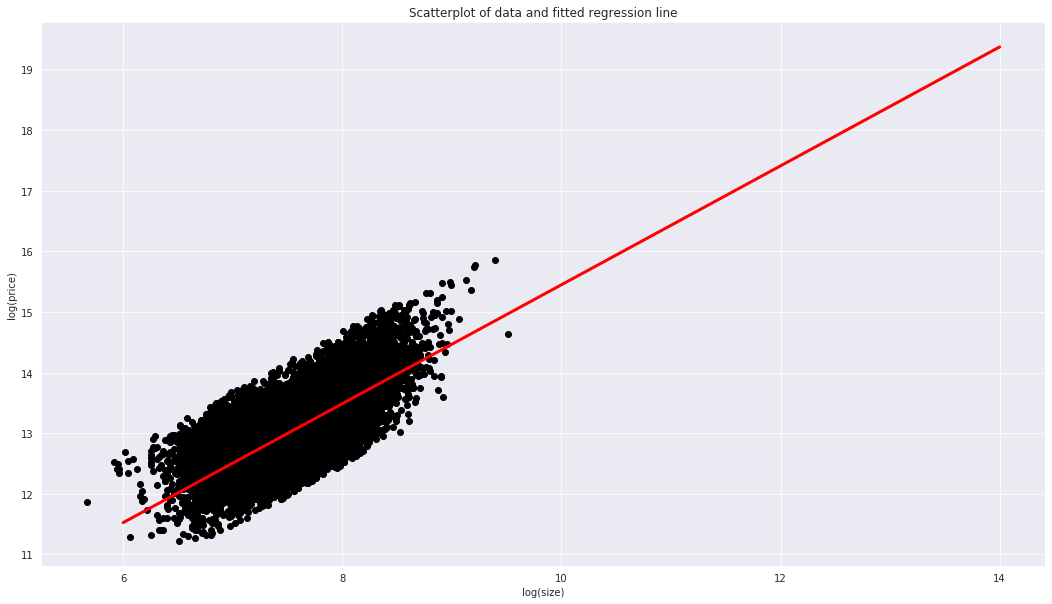

In [23]:
plot_results(intercept, slope)

In [24]:
bedrooms = np.array(housing['bedrooms'], np.float32)
params = tf.Variable([0.1, 0.05, 0.02])
def print_results(params):
	return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'.format(loss_function(params).numpy(), params[0].numpy(), params[1].numpy(), params[2].numpy()))

In [25]:
# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	# Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)

loss: 12.491, intercept: 0.101, slope_1: 0.051, slope_2: 0.021
loss: 12.479, intercept: 0.102, slope_1: 0.052, slope_2: 0.022
loss: 12.467, intercept: 0.103, slope_1: 0.053, slope_2: 0.023
loss: 12.455, intercept: 0.104, slope_1: 0.054, slope_2: 0.024
loss: 12.443, intercept: 0.105, slope_1: 0.055, slope_2: 0.025
loss: 12.431, intercept: 0.106, slope_1: 0.056, slope_2: 0.026
loss: 12.419, intercept: 0.107, slope_1: 0.057, slope_2: 0.027
loss: 12.408, intercept: 0.108, slope_1: 0.058, slope_2: 0.028
loss: 12.396, intercept: 0.109, slope_1: 0.059, slope_2: 0.029
loss: 12.384, intercept: 0.110, slope_1: 0.060, slope_2: 0.030


### Batch training
- The chunksize parameter
    - `pd.read_csv()` allows us to load data in batches. 
    - Avoid loading entire dataset. 
    - `chunksize` parameter provides batch size. 

### Training a linear model in batches

In [27]:
# Define trainable variables
intercept = tf.Variable(0.1, tf.float32)
slope = tf.Variable(0.1, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
    return intercept + features * slope

In [29]:
# Compute predicted values and return loss function
def loss_function(intercept, slope, targets, features):
    predictions = linear_regression(intercept, slope, features)
    return tf.keras.losses.mse(targets, predictions) 

# Define optimization operation
opt = tf.keras.optimizers.Adam()

In [30]:
for batch in pd.read_csv('data/kc_house_data.csv', chunksize=100):
    # Extract price column
    price_batch = np.array(batch['price'], np.float32)
    
    # Extract size column
    size_batch = np.array(batch['sqft_living'], np.float32)
    
    
    # Minimize the loss function
    opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch),
                var_list=[intercept, slope])
    
# Print parameter values
print(intercept.numpy(), slope.numpy())

0.32755554 0.32559523


### Full sample versus batch training

- Full Sample
    1. One update per epoch
    2. Accepts dataset without modification
    3. Limited by memory

- Batch training 
    1. Multiple updates per epoch
    2. Requires division of dataset
    3. No 

In [ ]:
#? tf.Variable chevon 9x12 9939 shale ave 

In [ ]:
!../gitbsh > /dev/null 2>&1